# Working With Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# configure matplotlib output
import matplotlib as mpl
mpl.style.use('config/clean.mplstyle') # this loads my personal plotting settings
%matplotlib inline

In [3]:
# if you have an HD display
%config InlineBackend.figure_format = 'retina'

In [4]:
# some warnings can get annoying
import warnings
warnings.filterwarnings('ignore')

# Pandas!

## DataFrame

In [5]:
s = pd.Series(np.random.rand(10), index=np.arange(10, 20))
s

10    0.803527
11    0.051132
12    0.279271
13    0.485287
14    0.477684
15    0.684263
16    0.461609
17    0.002092
18    0.753432
19    0.502871
dtype: float64

In [6]:
print(s.index)
print(s.values)

Int64Index([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')
[0.80352669 0.05113197 0.27927145 0.48528744 0.4776843  0.68426323
 0.4616088  0.00209165 0.75343198 0.50287052]


In [7]:
s.describe()

count    10.000000
mean      0.450117
std       0.271976
min       0.002092
25%       0.324856
50%       0.481486
75%       0.638915
max       0.803527
dtype: float64

In [8]:
df = pd.DataFrame({'ser1': s, 'ser2': np.random.randn(10)})
df.head()

,ser1,ser2
10,0.803527,-0.640355
11,0.051132,2.036143
12,0.279271,-1.286315
13,0.485287,1.001598
14,0.477684,0.722337


In [9]:
df.describe()

,ser1,ser2
count,10.000000,10.000000
mean,0.450117,0.384861
std,0.271976,1.082760
min,0.002092,-1.286315
25%,0.324856,-0.454208
50%,0.481486,0.486789
75%,0.638915,0.931783
max,0.803527,2.036143


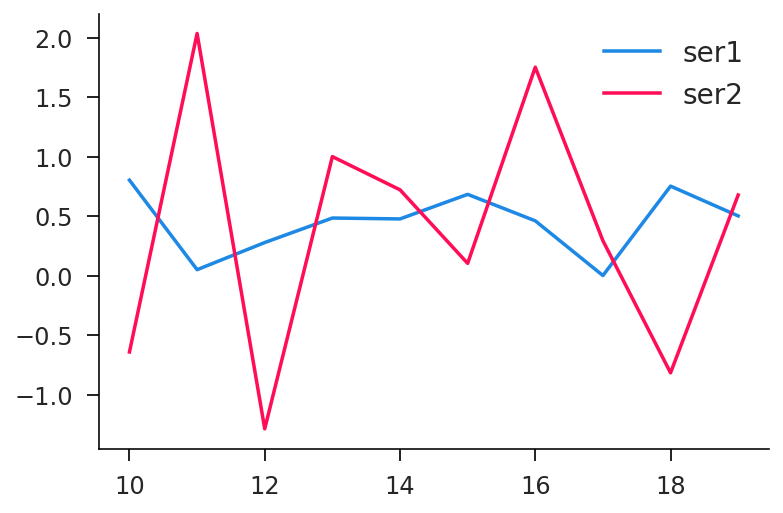

In [10]:
df.plot();

In [11]:
df['ser1']

10    0.803527
11    0.051132
12    0.279271
13    0.485287
14    0.477684
15    0.684263
16    0.461609
17    0.002092
18    0.753432
19    0.502871
Name: ser1, dtype: float64

In [12]:
df['ser1'] > 0.5

10     True
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18     True
19     True
Name: ser1, dtype: bool

In [13]:
df1 = df[df['ser1']>0.5]
df1

,ser1,ser2
10,0.803527,-0.640355
15,0.684263,0.104232
18,0.753432,-0.815651
19,0.502871,0.678838


In [14]:
df.query('ser1 > 0.5')

,ser1,ser2
10,0.803527,-0.640355
15,0.684263,0.104232
18,0.753432,-0.815651
19,0.502871,0.678838


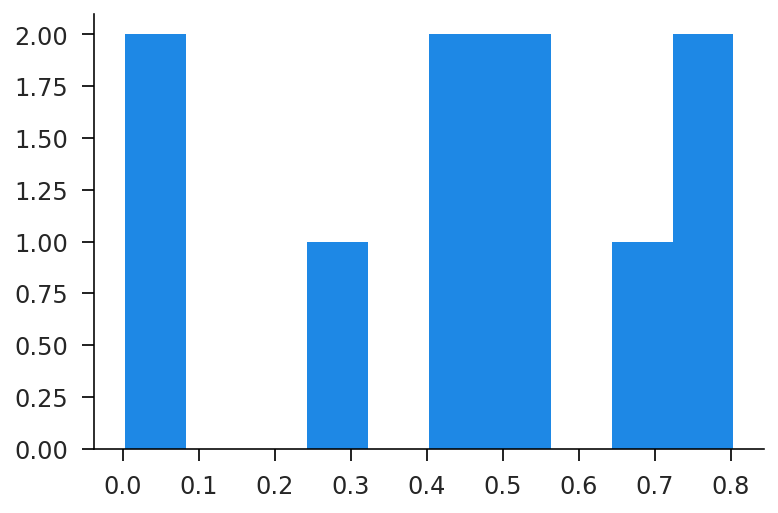

In [15]:
df['ser1'].hist(grid=False);

## Grouping Data

In [16]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block]+np.random.randn(N)*cvars[block]
df = pd.DataFrame({
    'block': block,
    'value': value
})

In [17]:
df.head(10)

,block,value
0,2,-0.126265
1,0,0.353807
2,2,0.597615
3,1,0.163861
4,2,0.204974
5,0,0.188149
6,3,-0.075382
7,3,0.593932
8,1,0.005268
9,1,0.299467


In [18]:
df.groupby('block').size()

block
0    24
1    28
2    20
3    28
dtype: int64

In [19]:
df.groupby('block')['value'].mean()

block
0    0.076187
1    0.205520
2    0.311701
3    0.410639
Name: value, dtype: float64

In [20]:
df.groupby('block')['value'].std()

block
0    0.161066
1    0.123285
2    0.389325
3    0.229107
Name: value, dtype: float64

In [21]:
df.groupby('block')['value'].apply(lambda x: np.mean(np.abs(x-np.mean(x))))

block
0    0.131386
1    0.102172
2    0.333330
3    0.166090
Name: value, dtype: float64

In [22]:
grp = df.groupby('block')['value']
pd.DataFrame({
    'mean': grp.mean(),
    'stdv': grp.std(),
    'absd': grp.apply(lambda x: np.mean(np.abs(x-np.mean(x))))
})

,mean,stdv,absd
block,,,
0,0.076187,0.161066,0.131386
1,0.205520,0.123285,0.102172
2,0.311701,0.389325,0.333330
3,0.410639,0.229107,0.166090


## Time Series

In [23]:
ret = 0.05 # yearly return
vol = 0.1 # yearly volatility

In [24]:
days = pd.date_range('2016-01-01', '2016-12-31', freq='D')
N = len(days)
T = (days.max()-days.min()).days/365.25
delt = T/N

In [25]:
vals = vol*np.sqrt(delt)*np.cumsum(np.random.randn(N))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')
df.head()

,price
date,
2016-01-01,-0.002147
2016-01-02,-0.004419
2016-01-03,-0.007466
2016-01-04,-0.007799
2016-01-05,-0.007326


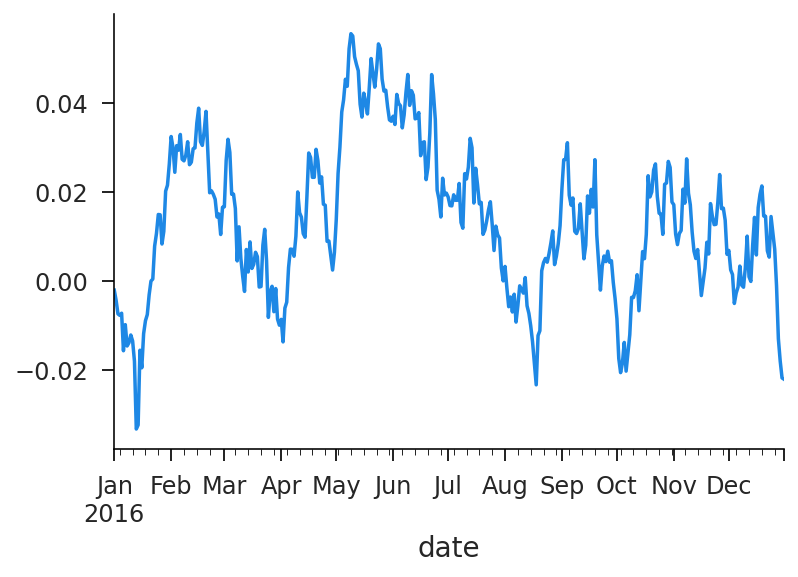

In [26]:
df['price'].plot();

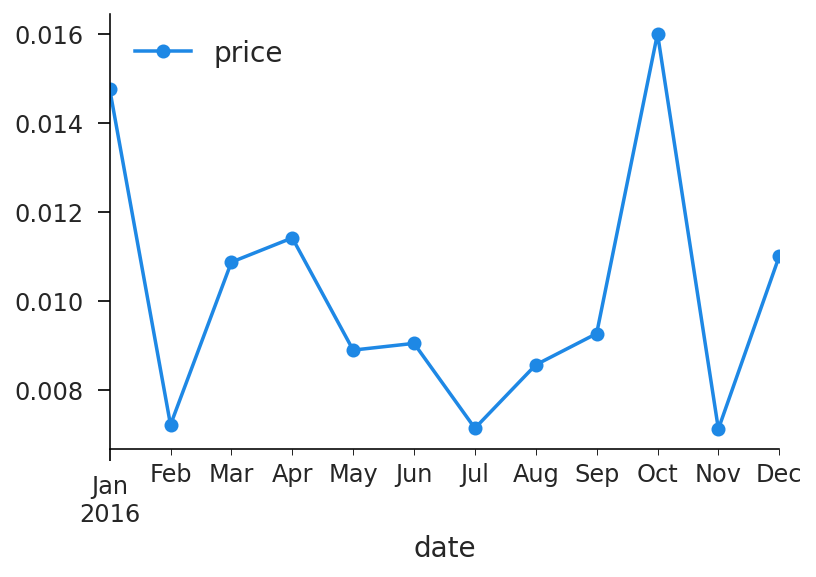

In [27]:
df.groupby(pd.Grouper(freq='MS')).std().plot(marker='o');

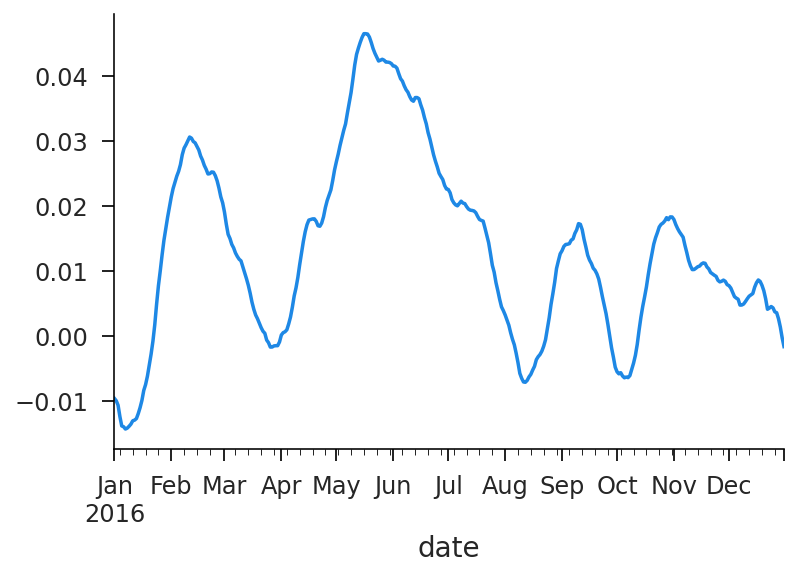

In [28]:
df.rolling(20, center=True, min_periods=5).mean().plot(legend=False);

## Transforming

In [29]:
ret = 0.05 # yearly return
vol = 0.1 # yearly volatility

In [30]:
days = pd.date_range('2006-01-01', '2016-12-31', freq='D')
N = len(days)
T = (days.max()-days.min()).days/365.25
delt = T/N

In [31]:
vals = vol*np.sqrt(delt)*np.cumsum(np.random.randn(len(days)))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')

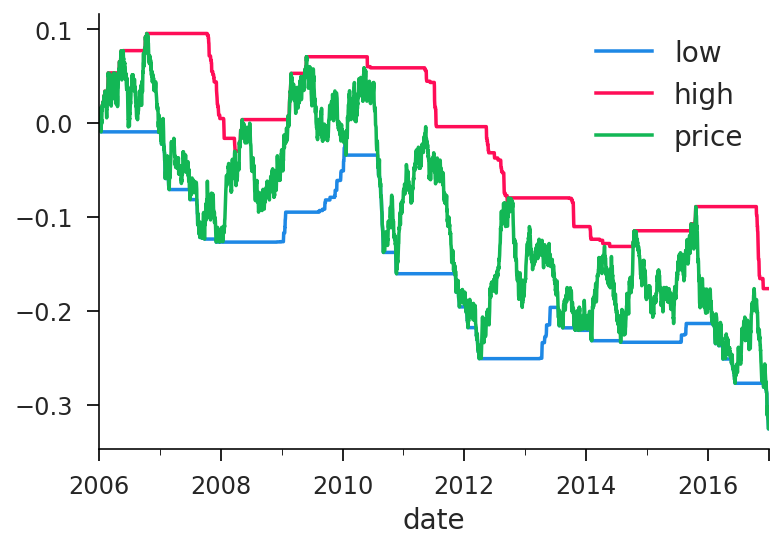

In [32]:
roll = df['price'].rolling(52*7, min_periods=1)
pd.DataFrame({
    'low' : roll.min(),
    'high': roll.max(),
    'price': df['price']
}).plot();

## Plotting

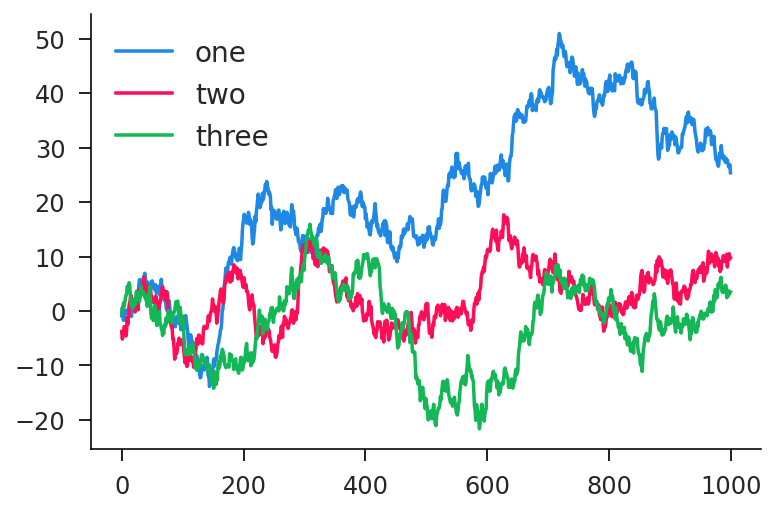

In [33]:
# good way to arrange plots
pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
}).plot();

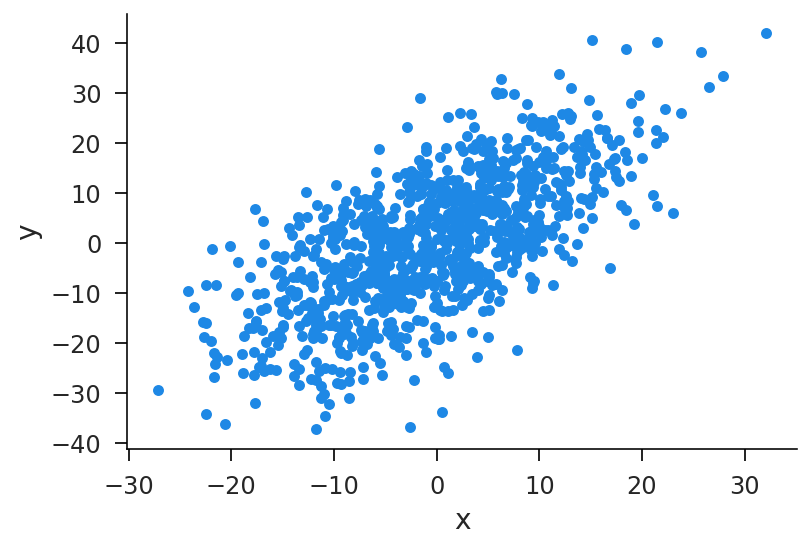

In [34]:
x = 10*np.random.randn(1000)
y = x + 10*np.random.randn(1000)
df = pd.DataFrame({
    'x': x,
    'y': y
})
df.plot.scatter(x='x', y='y');

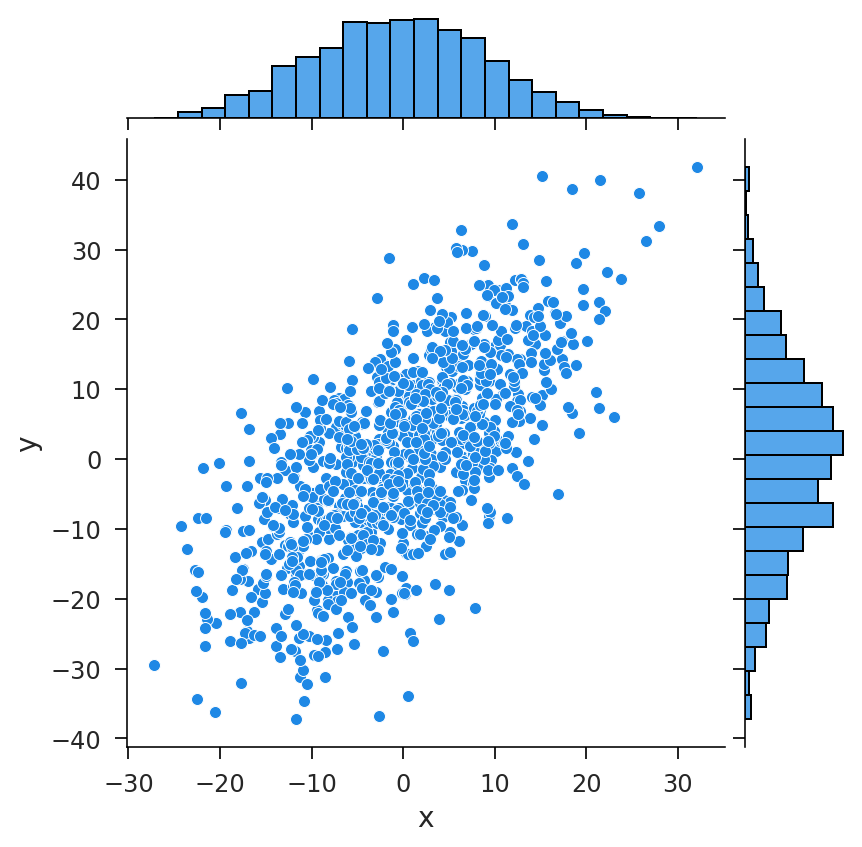

In [35]:
sns.jointplot(x='x', y='y', data=df);

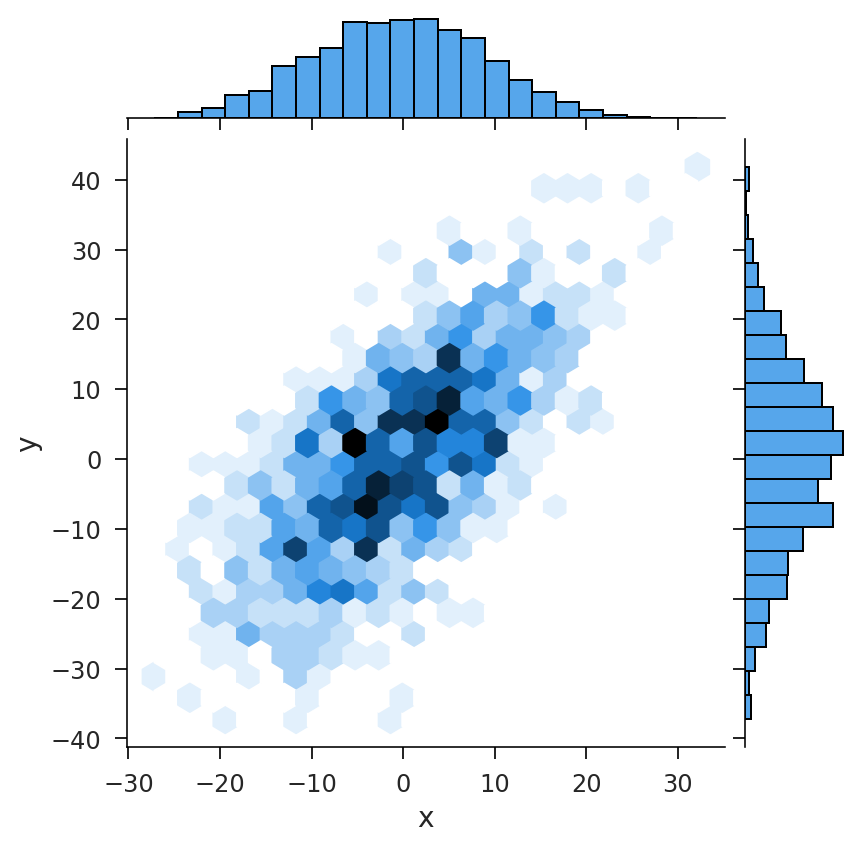

In [36]:
# kind in ['scatter', 'reg', 'resid', 'kde', 'hex']
sns.jointplot(x='x', y='y', kind='hex', data=df);

## Indexing

In [37]:
df = pd.DataFrame({
    'a': np.arange(10),
    'b': np.random.rand(10)
}, index=np.arange(10, 20))
df

,a,b
10,0,0.793143
11,1,0.381018
12,2,0.476546
13,3,0.071773
14,4,0.725196
15,5,0.349129
16,6,0.954571
17,7,0.040020
18,8,0.272948
19,9,0.062685


In [38]:
# slicing on index
df.loc[14]

a    4.000000
b    0.725196
Name: 14, dtype: float64

In [39]:
# slicing on location
df.iloc[4]

a    4.000000
b    0.725196
Name: 14, dtype: float64

In [40]:
# slicing on column
df['a']

10    0
11    1
12    2
13    3
14    4
15    5
16    6
17    7
18    8
19    9
Name: a, dtype: int64

In [41]:
# selecting
df[df['a']>5]

,a,b
16,6,0.954571
17,7,0.040020
18,8,0.272948
19,9,0.062685


In [42]:
# advanced selecting
df[(df['a']>3)&(df['a']<8)]

,a,b
14,4,0.725196
15,5,0.349129
16,6,0.954571
17,7,0.040020


In [43]:
# selection mechanism
df['a'] > 3

10    False
11    False
12    False
13    False
14     True
15     True
16     True
17     True
18     True
19     True
Name: a, dtype: bool

In [44]:
# querying
df.query('a > 3 and a < 8')

,a,b
14,4,0.725196
15,5,0.349129
16,6,0.954571
17,7,0.040020


## Joining

In [45]:
mapp = pd.Series({x: 2*x for x in range(10)}, name='twox')
mapp

0     0
1     2
2     4
3     6
4     8
5    10
6    12
7    14
8    16
9    18
Name: twox, dtype: int64

In [46]:
init = pd.DataFrame({
    'ser': np.random.randint(10, size=100),
    'val': np.random.rand(100)
})
init.head()

,ser,val
0,8,0.529336
1,3,0.804222
2,2,0.999758
3,8,0.878601
4,4,0.585077


In [47]:
final = init.join(mapp, on='ser')
final.head()

,ser,val,twox
0,8,0.529336,16
1,3,0.804222,6
2,2,0.999758,4
3,8,0.878601,16
4,4,0.585077,8


In [48]:
final['check'] = final['twox'] == 2*final['ser']
final.head()

,ser,val,twox,check
0,8,0.529336,16,True
1,3,0.804222,6,True
2,2,0.999758,4,True
3,8,0.878601,16,True
4,4,0.585077,8,True


In [49]:
print(final['check'].all())

True


### Stack and unstack (and some pivot)

In [50]:
# this constructs a family structure table
M, N = 5, 12
from itertools import cycle
cmap = list(zip(cycle(range(M)), range(100, 100+N), np.random.rand(N)))
pmap = pd.DataFrame(cmap, columns=['pid', 'cid', 'income'])
pmap = pmap.sort_values('pid').reset_index(drop=True)
pmap[['pid', 'cid']] = pmap[['pid', 'cid']].astype('Int64') # so we get integer nulls
pmap

,pid,cid,income
0,0,100,0.261929
1,0,105,0.356799
2,0,110,0.275919
3,1,101,0.071534
4,1,106,0.729817
5,1,111,0.563874
6,2,102,0.070200
7,2,107,0.025008
8,3,103,0.865918
9,3,108,0.265573


In [51]:
# tabulate the order of each child
pmap['order'] = pmap.groupby('pid').cumcount().apply(lambda x: f'child{x}')
ptab = pmap.set_index(['pid', 'order'])
ptab

cid    income
pid order                
0   child0  100  0.261929
    child1  105  0.356799
    child2  110  0.275919
1   child0  101  0.071534
    child1  106  0.729817
    child2  111  0.563874
2   child0  102  0.070200
    child1  107  0.025008
3   child0  103  0.865918
    child1  108  0.265573
4   child0  104  0.392924
    child1  109  0.812216

In [52]:
fam = ptab.unstack(level=1)
fam

cid                  income                    
order child0 child1 child2    child0    child1    child2
pid                                                     
0        100    105    110  0.261929  0.356799  0.275919
1        101    106    111  0.071534  0.729817  0.563874
2        102    107   <NA>  0.070200  0.025008       NaN
3        103    108   <NA>  0.865918  0.265573       NaN
4        104    109   <NA>  0.392924  0.812216       NaN

In [53]:
# the reverse operation gives us what we started with
fam.stack(level='order')

cid    income
pid order                
0   child0  100  0.261929
    child1  105  0.356799
    child2  110  0.275919
1   child0  101  0.071534
    child1  106  0.729817
    child2  111  0.563874
2   child0  102  0.070200
    child1  107  0.025008
3   child0  103  0.865918
    child1  108  0.265573
4   child0  104  0.392924
    child1  109  0.812216

In [54]:
# we can do this with pivot too (but nulls are d
pmap.pivot('pid', 'order', ['cid', 'income'])

cid                  income                    
order child0 child1 child2    child0    child1    child2
pid                                                     
0        100    105    110  0.261929  0.356799  0.275919
1        101    106    111  0.071534  0.729817  0.563874
2        102    107    NaN    0.0702  0.025008       NaN
3        103    108    NaN  0.865918  0.265573       NaN
4        104    109    NaN  0.392924  0.812216       NaN

## Input/Output

In [55]:
df = pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
})
df.to_csv('output/series.csv', index=False)

In [56]:
!head output/series.csv

one,two,three
-1.0857626200683186,0.968093671598692,-2.251409630359205
-2.451287734035975,1.7349209899409193,-3.792834085361274
-2.3596585480156187,0.5840923343776954,-2.6492463798118497
-3.4646392685413723,1.9950426590311057,-3.7776128167854477
-4.964282032842841,3.177904460982435,-3.846444541914279
-3.377006641440949,3.7081976790891833,-4.9907315686110305
-2.81746312277517,3.6735167206208597,-5.316426244756913
-3.9735492404885813,4.243482913776457,-5.061519748710388
-3.8688287477721257,4.242965205388836,-3.7729876392160424


In [57]:
df = pd.read_csv('output/series.csv')
df.head()

,one,two,three
0,-1.085763,0.968094,-2.251410
1,-2.451288,1.734921,-3.792834
2,-2.359659,0.584092,-2.649246
3,-3.464639,1.995043,-3.777613
4,-4.964282,3.177904,-3.846445


Can also use the many `pd.DataFrame.to_*` and `pd.read_*` function where `*` is one of:
- csv
- excel
- parquet
- json
- html
- latex
- stata
- sql

Parquet is relatively new and interesting! It is fast but not as heavy as SQL, but it also doesn't suffer from the same typing issues that CSV sometimes does.

## External Data

In [58]:
import pandas_datareader as pdr

In [59]:
emp = pdr.fred.FredReader(['UNRATE', 'LNS12300060'], start='1948-01-01').read()
emp = emp.rename(columns={'UNRATE': 'unemp', 'LNS12300060': 'empop'}).rename_axis('date')
emp.head()

,unemp,empop
date,,
1948-01-01,3.4,62.6
1948-02-01,3.8,62.7
1948-03-01,4.0,62.6
1948-04-01,3.9,62.9
1948-05-01,3.5,62.5


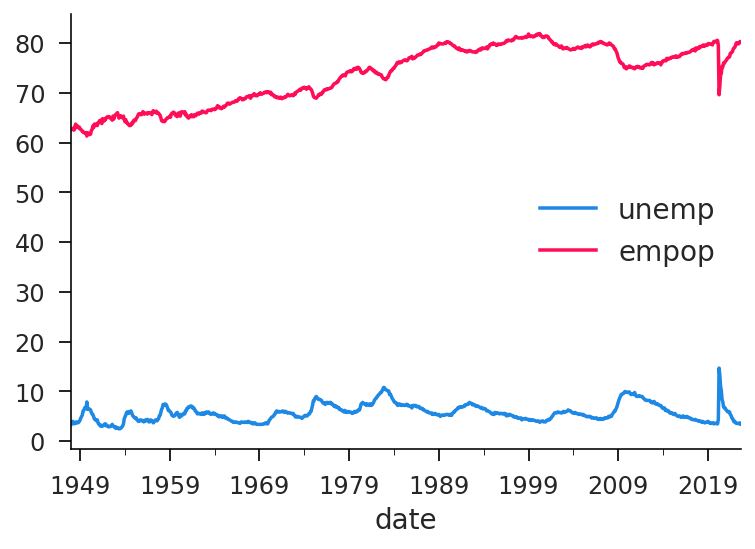

In [60]:
emp.plot();

In [61]:
# detrender
def detrend(s):
    name = s.name
    df = s.reset_index()
    df['year'] = df['date'].dt.year
    ret = smf.ols(f'{name} ~ 1 + year', data=df.reset_index()).fit()
    pred = pd.Series(ret.predict(), index=s.index)
    return s - pred

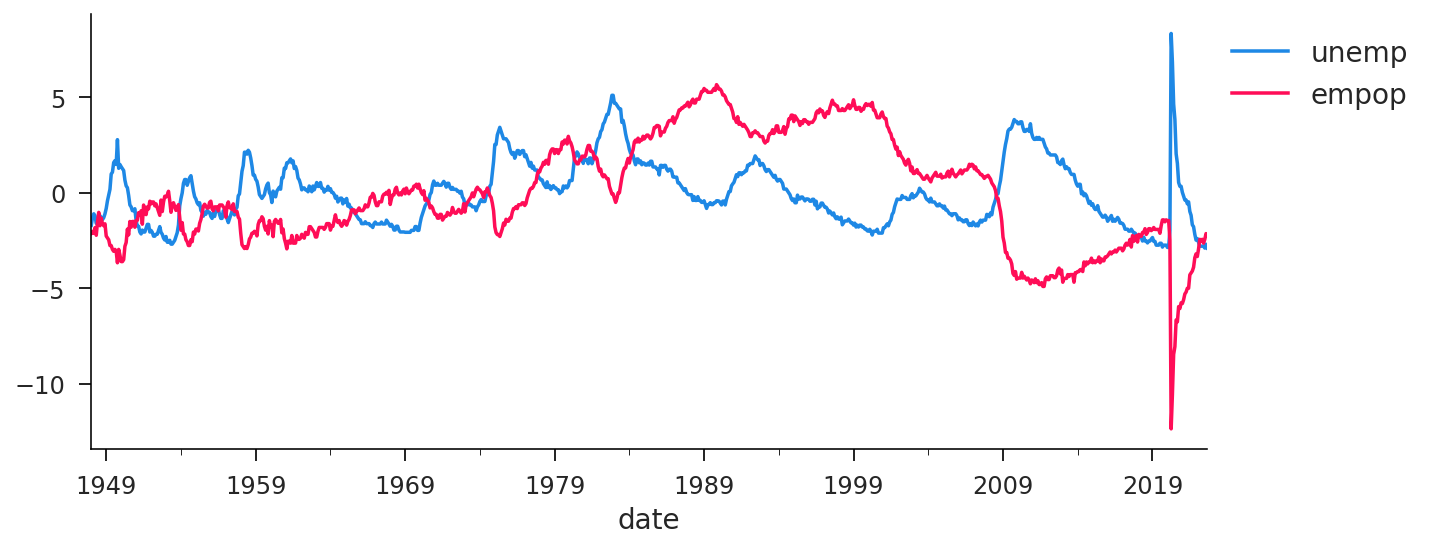

In [62]:
emp.apply(detrend).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [63]:
# detrend poly!
def detrendn(s, deg=1):
    name = s.name
    df = s.reset_index()
    df['year'] = df['date'].dt.year
    df['zyear'] = df['year'] - df['year'].min()
    reg = []
    for n in range(deg+1):
        ds = f'year{n}'
        df[ds] = df['zyear']**n
        reg.append(ds)
    reg = f'{name} ~ ' + ' + '.join(reg)
    ret = smf.ols(reg, data=df).fit()
    pred = pd.Series(ret.predict(), index=s.index)
    return s - pred

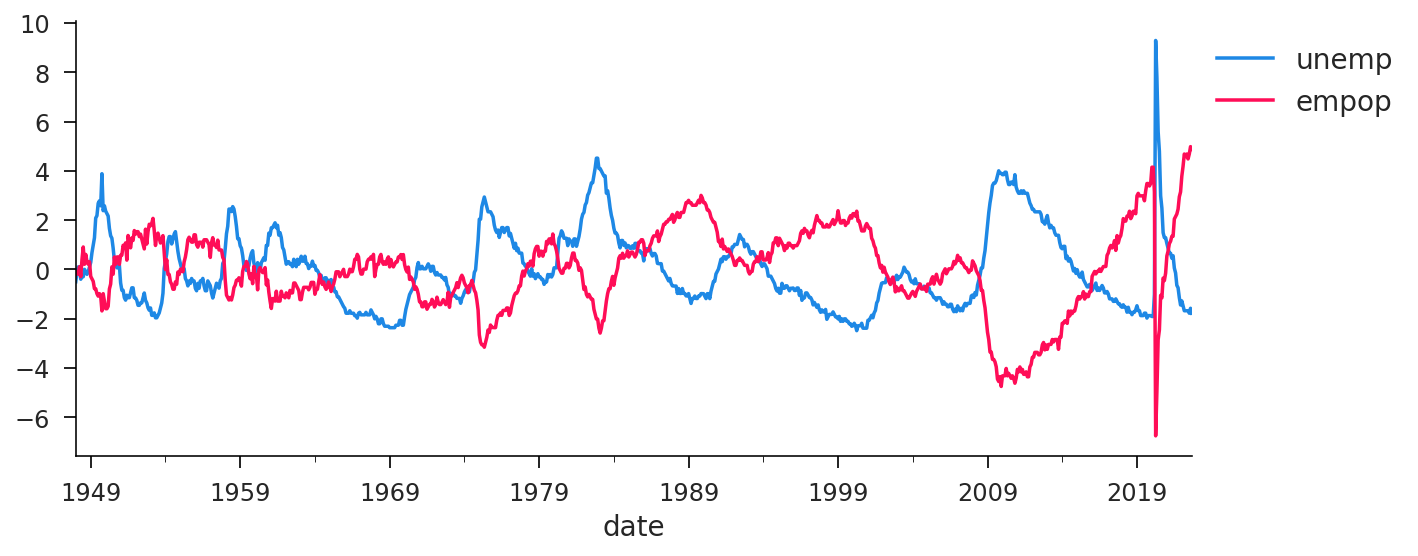

In [64]:
emp.apply(lambda s: detrendn(s, deg=3)).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [65]:
# let's not reinvent the wheel
def detrendn1(s, deg=1):
    year = s.index.year
    zyear = year - year.min()
    coef = np.polyfit(zyear, s, deg)
    vals = np.polyval(coef, zyear)
    pred = pd.Series(vals, index=s.index, name=s.name)
    return s - pred

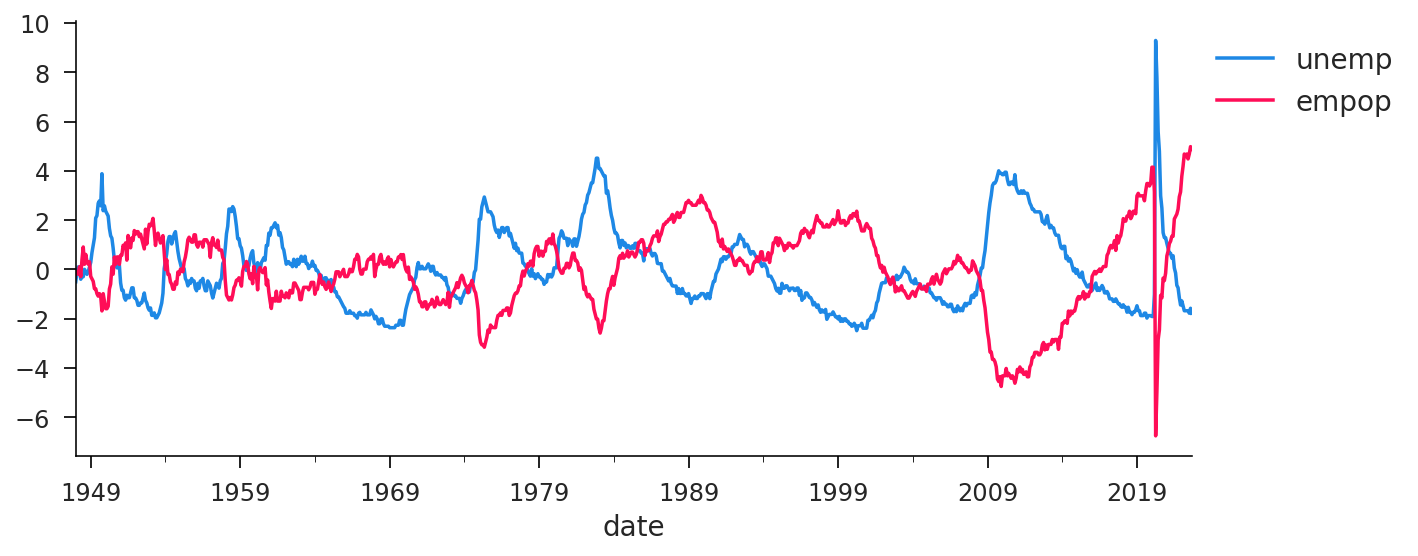

In [66]:
emp.apply(lambda s: detrendn1(s, deg=3)).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

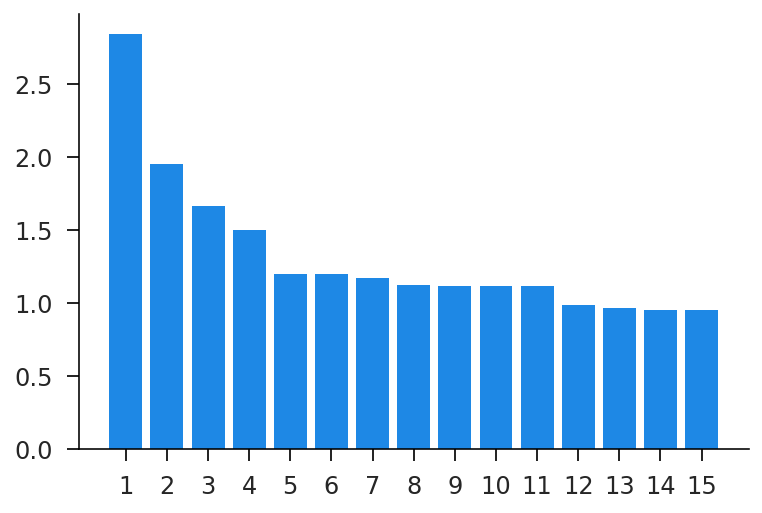

In [67]:
dvec = np.arange(1, 15+1)
plt.bar(dvec, [np.std(detrendn1(emp['empop'], deg=d)) for d in dvec]);
plt.xticks(dvec);

# Regressions

In [68]:
import statsmodels.formula.api as smf

## Basic

In [69]:
N = 100
x = np.random.randn(N)
y = 3*np.random.randn(N)
z = 1 + 2*x + 3*y + 4*x*y + np.random.randn(N)
df0 = pd.DataFrame({
    'x': x,
    'y': y,
    'z': z
})

In [70]:
ret = smf.ols('z ~ 1 + x + y', data=df0).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     32.42
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.65e-11
Time:                        16:08:37   Log-Likelihood:                -409.81
No. Observations:                 100   AIC:                             825.6
Df Residuals:                      97   BIC:                             833.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2031      1.481     -0.812      0.419      -4.142       1.736
x             -0.8987      1.419     -0.633      0.528      -3.715       1.918
y              3.7220      0.476      7.820      0.000       2.777       4.667
==============================================================================
Omnibus:                       84.148   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1081.011
Skew:                          -2.480   Prob(JB):                    1.83e-235
Kurtosis:                      18.324   Cond. No.                         3.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
ret.params

Intercept   -1.203124
x           -0.898655
y            3.721999
dtype: float64

In [72]:
ret = smf.ols('z ~ 1 + x*y', data=df0).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.006e+04
Date:                Wed, 19 Oct 2022   Prob (F-statistic):          8.98e-120
Time:                        16:08:37   Log-Likelihood:                -147.72
No. Observations:                 100   AIC:                             303.4
Df Residuals:                      96   BIC:                             313.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1275      0.110     10.282      0.000       0.910       1.345
x              2.0634      0.106     19.452      0.000       1.853       2.274
y              3.0008      0.035     85.224      0.000       2.931       3.071
x:y            4.0315      0.030    134.346      0.000       3.972       4.091
==============================================================================
Omnibus:                        0.293   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.469
Skew:                          -0.043   Prob(JB):                        0.791
Kurtosis:                       2.676   Cond. No.                         4.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

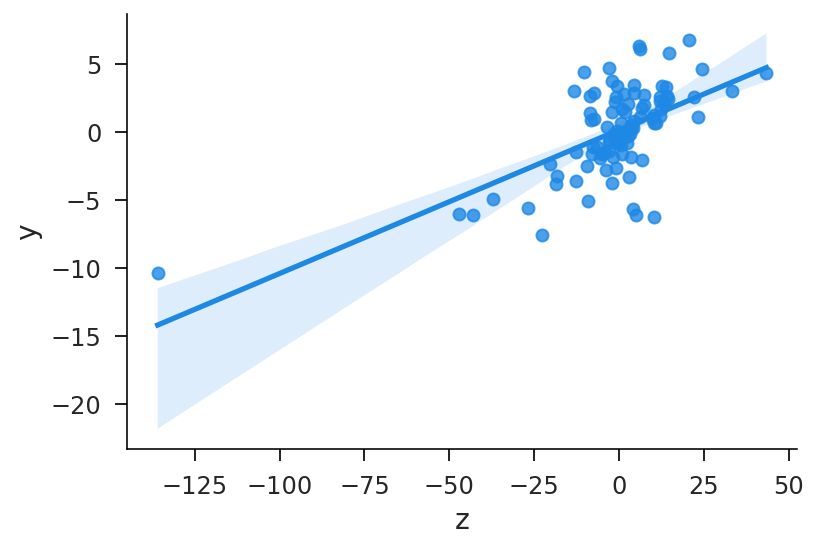

In [73]:
sns.regplot(x='z', y='y', data=df0);

## Categorical

In [74]:
import fastreg as fr
from fastreg import I, R, C

In [75]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block] + np.random.randn(N)*cvars[block]
df1 = pd.DataFrame({
    'block': block,
    'value': value
})

In [76]:
fr.ols(y=R.z, x=I+R.x+R.y, data=df0)

z,coeff,stderr,low95,high95,pvalue
I,-1.203124,1.480902,-4.105639,1.699391,4.165469e-01
x,-0.898655,1.419137,-3.680112,1.882803,5.265767e-01
y,3.721999,0.475955,2.789144,4.654855,5.329071e-15


In [77]:
fr.ols(y=R.z, x=I+R.x+R.y+R.x*R.y, data=df0)

z,coeff,stderr,low95,high95,pvalue
I,1.127495,0.109657,0.912570,1.342419,0.0
x,2.063428,0.106077,1.855520,2.271335,0.0
y,3.000827,0.035211,2.931814,3.069840,0.0
x*y,4.031528,0.030008,3.972713,4.090344,0.0


In [78]:
fr.ols(y=R.value, x=I+C.block, data=df1)

value,coeff,stderr,low95,high95,pvalue
I,0.069663,0.064436,-0.056628,0.195955,0.279639
block=1,0.152206,0.101395,-0.046525,0.350937,0.133325
block=2,0.243966,0.095406,0.056974,0.430959,0.010554
block=3,0.287924,0.100012,0.091904,0.483944,0.003991


## Bootstrapping

In [79]:
from sklearn.utils import resample

In [80]:
def gen_block_data(N, cmean, cvars):
    cmean = np.array(cmean)
    cvars = np.array(cvars)
    block = np.random.randint(len(cmean), size=N)
    value = cmean[block] + np.random.randn(N)*cvars[block]
    return pd.DataFrame({
        'block': block,
        'value': value
    })

In [81]:
N = 100
K = 1000
cmean = [0.1, 0.2, 0.3, 0.4]
cvars = [0.2, 0.1, 0.5, 0.2]
mygen = lambda: gen_block_data(N, cmean, cvars)
myy, myx = R.value, C.block(drop=fr.NONE)
data0 = mygen()
mysamp = lambda: resample(data0)

In [82]:
res = fr.ols(y=myy, x=myx, data=data0)
stderr_reg = res['stderr']

In [83]:
res = fr.ols(y=myy, x=myx, data=data0, stderr='hc3')
stderr_rob = res['stderr']

In [84]:
res = pd.DataFrame({i: fr.ols(y=myy, x=myx, data=mygen())['coeff'] for i in range(K)}).T
stderr_bsp0 = res.std()

In [85]:
res = pd.DataFrame({i: fr.ols(y=myy, x=myx, data=mysamp())['coeff'] for i in range(K)}).T
stderr_bsp = res.std()

In [86]:
pd.DataFrame({
    'stderr_reg': stderr_reg,
    'stderr_rob': stderr_rob,
    'stderr_bsp0': stderr_bsp0,
    'stderr_bsp': stderr_bsp
}).T

,block=0,block=1,block=2,block=3
stderr_reg,0.068415,0.069887,0.063340,0.067033
stderr_rob,0.045588,0.021085,0.109103,0.037081
stderr_bsp0,0.040486,0.019749,0.098470,0.040787
stderr_bsp,0.044999,0.021575,0.109924,0.035777


## Networks

In [87]:
import networkx as nx

In [88]:
df = pd.DataFrame({
    'src': np.random.randint(10, size=20),
    'dst': np.random.randint(10, size=20),
    'wgt': np.random.exponential(size=20)
})
df = df.drop_duplicates(subset=['src', 'dst'])
df = df.query('src != dst')
df.head()

,src,dst,wgt
0,0,8,1.789004
2,0,9,0.071053
3,9,4,1.617303
5,8,3,0.599391
6,5,8,2.099340


In [89]:
G = nx.Graph()
G.add_nodes_from(np.arange(10))
G.add_weighted_edges_from([(x['src'], x['dst'], x['wgt']) for i, x in df.iterrows()])
# G.add_weighted_edges_from(df[['src', 'dst', 'wgt']].values) # equivalent
G

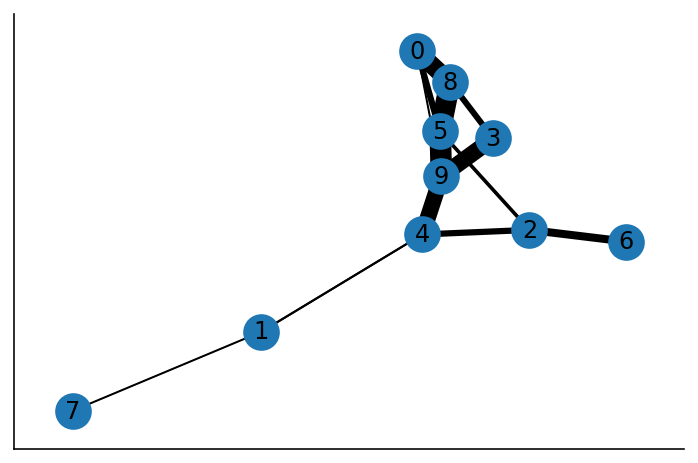

In [90]:
edgewidth = [5*d['weight'] for (u,v,d) in G.edges(data=True)]
pos = nx.spring_layout(G, iterations=50)
nx.draw_networkx(G, pos);
nx.draw_networkx_edges(G, pos, width=edgewidth);

In [91]:
nx.centrality.eigenvector.eigenvector_centrality(G, weight='weight')

{0: 0.2927399272234818,
 1: 0.012349321750694225,
 2: 0.0902435430614989,
 3: 0.264955977013001,
 4: 0.24495677904404606,
 5: 0.5630280297826828,
 6: 0.017577589279987014,
 7: 0.000264795495903939,
 8: 0.4543144097692157,
 9: 0.5020859008538053}

## MAPS

You'll need some external data for this part. Head on over to: https://dataverse.harvard.edu/dataverse/chgis_v6. Then click on the "V6 Time Series Prefecture Polygons" element and download `v6_time_pref_pgn_utf_wgs84.zip` to the `data/china_maps_history` folder.

In [92]:
import geopandas as gpd
from ipywidgets import interact, IntSlider

In [93]:
pref_hist = gpd.read_file('data/china_maps_history/v6_time_pref_pgn_utf_wgs84.zip')
pref_hist = pref_hist.rename(columns={
    'NAME_CH': 'name_zh',
    'NAME_PY': 'name_en',
    'BEG_YR': 'beg_yr',
    'END_YR': 'end_yr'
})[['name_zh', 'name_en', 'beg_yr', 'end_yr', 'geometry']]
print(len(pref_hist))
pref_hist.head()

3830


,name_zh,name_en,beg_yr,end_yr,geometry
0,辽州,Liao Zhou,1151,1217,"POLYGON ((113.54941 36.75454, 113.54329 36.752..."
1,沁州,Qin Zhou,1129,1217,"MULTIPOLYGON (((112.00320 36.84234, 112.00954 ..."
2,霍州,Huo Zhou,1772,1911,"MULTIPOLYGON (((111.85910 36.44626, 111.86777 ..."
3,南泽州,Nanzhe Zhou,1128,1150,"POLYGON ((113.23645 35.44530, 113.22804 35.444..."
4,泽州,Zezhou Fu,1151,1217,"POLYGON ((113.23645 35.44530, 113.22804 35.444..."


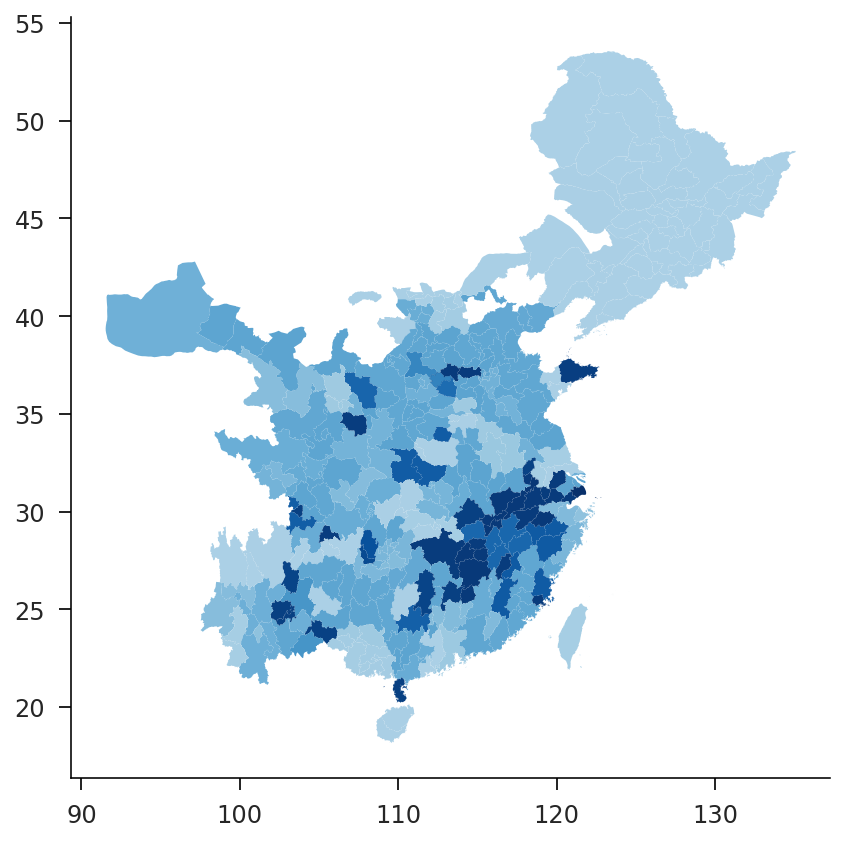

In [94]:
pref_1911 = pref_hist.query('beg_yr < 1911 and end_yr >= 1911')
pref_1911.plot(column='beg_yr', cmap='Blues_r', vmax=2200, figsize=(7, 7));

In [95]:
def plot_year(yr):
    df = pref_hist.query(f'beg_yr <= {yr} and end_yr >= {yr}')
    df['age'] = yr - df['beg_yr']
    yrmax = df['age'].max()
    fig, ax = plt.subplots(figsize=(7, 7))
    df.plot(column='age', cmap='Blues', ax=ax, vmin=-100, vmax=600);
    ax.set_xlim(85, 135)
    ax.set_ylim(15, 50)
    ax.set_aspect('equal')
interact(plot_year, yr=IntSlider(min=-224, max=1911, value=1900));

interactive(children=(IntSlider(value=1900, description='yr', max=1911, min=-224), Output()), _dom_classes=('w…

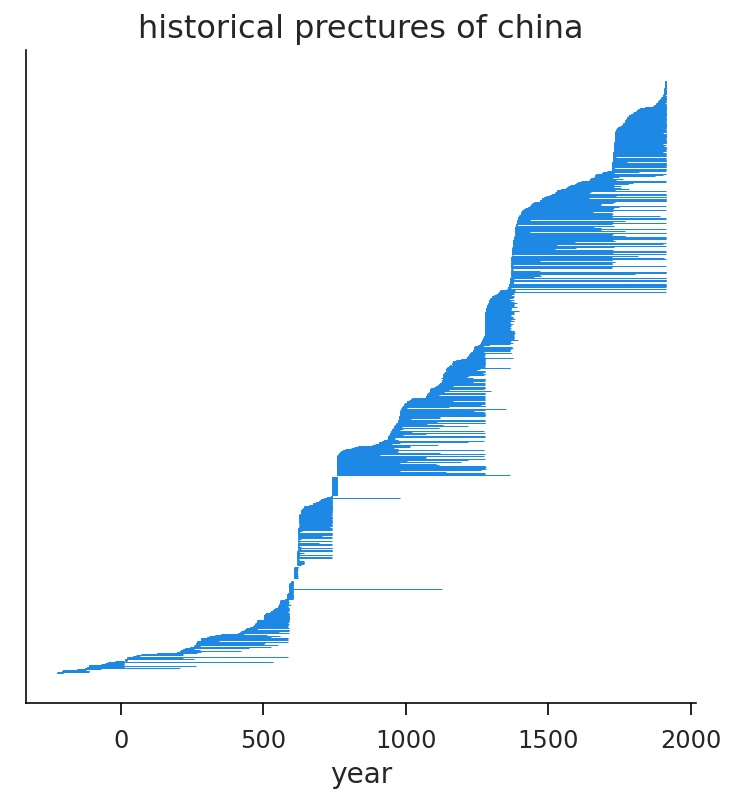

In [96]:
fig, ax = plt.subplots(figsize=(6, 6))
pref_range = pref_hist.sort_values('beg_yr')[['beg_yr', 'end_yr']].set_index(np.arange(len(pref_hist)))
for (i, (b, e)) in pref_range.iterrows():
    ax.hlines(i, b, e, linewidth=0.5)
ax.yaxis.set_visible(False);
ax.set_xlabel('year');
ax.set_title('historical prectures of china');

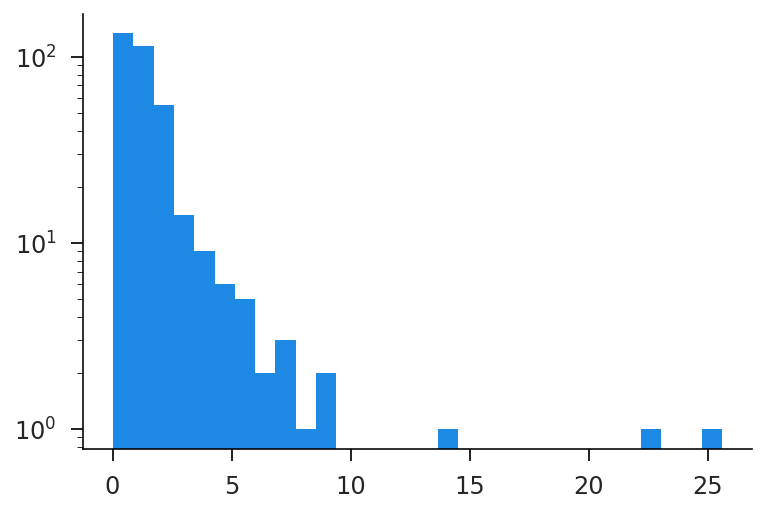

In [97]:
pref_hist.query('end_yr == 1911').area.hist(log=True, bins=30, grid=False);

### Advanced

Here you'll need the shapefiles for modern Chinese prefectures. Head on over to https://data.humdata.org/dataset/cod-ab-chn. Then download `chn_adm_ocha_2020_SHP.zip`, place it in the `data/china_maps_modern` directory, and unzip it.

In [98]:
year = 1776
pref_old = pref_hist.query(f'beg_yr <= {year} and end_yr >= {year}')
pref_old = pref_old[pref_old.is_valid]
pref_old.head()

,name_zh,name_en,beg_yr,end_yr,geometry
2,霍州,Huo Zhou,1772,1911,"MULTIPOLYGON (((111.85910 36.44626, 111.86777 ..."
184,郧阳府,Yunyang Fu,1476,1911,"POLYGON ((110.91881 31.66655, 110.90642 31.662..."
185,襄阳府,Xiangyang Fu,1476,1911,"POLYGON ((112.65113 31.66701, 112.65419 31.657..."
186,德安府,De'an Fu,1729,1911,"POLYGON ((113.91801 31.39151, 113.91645 31.384..."
187,汉阳府,Hanyang Fu,1763,1911,"POLYGON ((114.35085 30.68763, 114.35251 30.686..."


In [99]:
pref_new = gpd.read_file('data/china_maps_modern/chn_admbnda_adm2_ocha_2020.shp')
pref_new = pref_new.rename(columns={
    'ADM2_ZH': 'name_zh',
    'ADM2_EN': 'name_en',
})[['name_zh', 'name_en', 'geometry']]
pref_new.head()

,name_zh,name_en,geometry
0,克拉玛依市,Karamay,"POLYGON ((85.26975 45.29042, 85.29748 45.25837..."
1,昌吉回族自治州,Changji Hui Autonomous Prefecture,"POLYGON ((91.57898 45.05081, 91.53255 44.96698..."
2,石河子市[1],Shihezi,"POLYGON ((86.10937 44.26667, 86.11806 44.11220..."
3,锡林郭勒盟,Xilingol League,"POLYGON ((119.78428 46.64984, 119.86729 46.598..."
4,本溪市,Benxi,"POLYGON ((125.53547 40.92808, 125.46792 40.922..."


In [100]:
# choose a random modern prefecture
pref_samp = pref_new.query('name_zh == "成都市"')
name_zh, name_en = pref_samp.iloc[0][['name_zh', 'name_en']]
print(name_zh, name_en)

成都市 Chengdu


In [101]:
# efficiently find the intersection with old provinces
xmin, ymin, xmax, ymax = pref_samp.iloc[[0]].total_bounds
old_subset = pref_old.cx[xmin:xmax, ymin:ymax]
print(len(old_subset))
inter = gpd.overlay(old_subset[['name_en', 'name_zh', 'geometry']], pref_samp, how='intersection')
print(inter[['name_en_1', 'name_zh_1']].drop_duplicates())

9
      name_en_1 name_zh_1
0       Zi Zhou        资州
1    Chengdu Lu       成都府
2  Tongchuan Fu       潼川府
3      Mei Zhou        眉州
4    Qiong Zhou        邛州
5      Mao Zhou        茂州
6     Yazhou Fu       雅州府


In [102]:
from matplotlib import font_manager
font = font_manager.FontProperties()
font.set_family('Noto Sans CJK JP')
font.set_size(14)

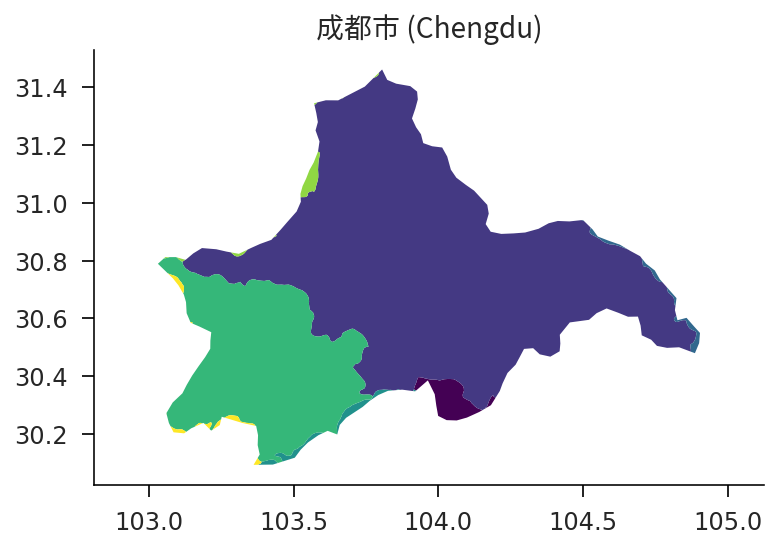

In [103]:
inter1 = inter[inter.area>0.001]
inter1['index'] = np.arange(len(inter1))
inter1.plot(column='index', cmap='viridis');
plt.title(f'{name_zh} ({name_en})', fontproperties=font);
plt.axis('equal');